# modDR-Framework example: UCI-ID 186 Wine Quality

In this example, the moddr framework is demonstrated using the ‘UCI-ID 186 Wine Quality’ dataset from the UCI Machine Learning Repository. Of the datasets examined, this dataset has the largest number of data points and a clearly recognisable global structure in the UMAP visualisation. However, with regard to the selected features, the data points in the UMAP visualisation are not arranged according to their neighbourhoods. Accordingly, this dataset can be used to examine the applicability of the framework to larger datasets.


The example is intended solely to demonstrate the functions of the framework. The selection of the feature chosen to model a similarity measure to be integrated was not based on content-related arguments, but solely on visual criteria.

Details about the dataset can be found at https://archive.ics.uci.edu/dataset/186/wine+quality.

The moddr package is required for execution (locally from https://github.com/kohaupt/modDR or as a PYPI package). Instructions for execution and installation can be found in the README.

## Imports

In [ ]:
# may require additional installations of the packages pandas, scikit-learn, ucimlrepo
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from ucimlrepo import fetch_ucirepo

import moddr

## Data exploration

The following steps show the initial visualisation of the dataset using the DR method (here, UMAP), with the modelled property represented by the colour of the data points via the first principal component of PCA. The selection of features has no content-related significance; it merely illustrates the difference in neighbourhood structure compared to the DR's positioning.

In [4]:
dataset = fetch_ucirepo(id=186)

X = dataset.data.features
y = dataset.data.target

pd.set_option("display.max_columns", None)
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [5]:
# chosen features
sim_features = ["sulphates", "alcohol", "citric_acid", "pH"]

In [6]:
reference_embedding = moddr.processing.dimensionality_reduction_umap(X, n_neighbors=15)

In [7]:
# scale chosen feature values to avoid higher influence of certain features
scaler = MinMaxScaler()
X_sim_scaled = X[sim_features].copy()
for col in sim_features:
    X_sim_scaled[col] = scaler.fit_transform(X_sim_scaled[[col]])

sim_features_reduced = PCA(n_components=1).fit_transform(X_sim_scaled)
feat_labels = {i: sim_features_reduced[i] for i in range(len(sim_features_reduced))}
reference_embedding.labels = feat_labels
reference_embedding.obj_id = 0

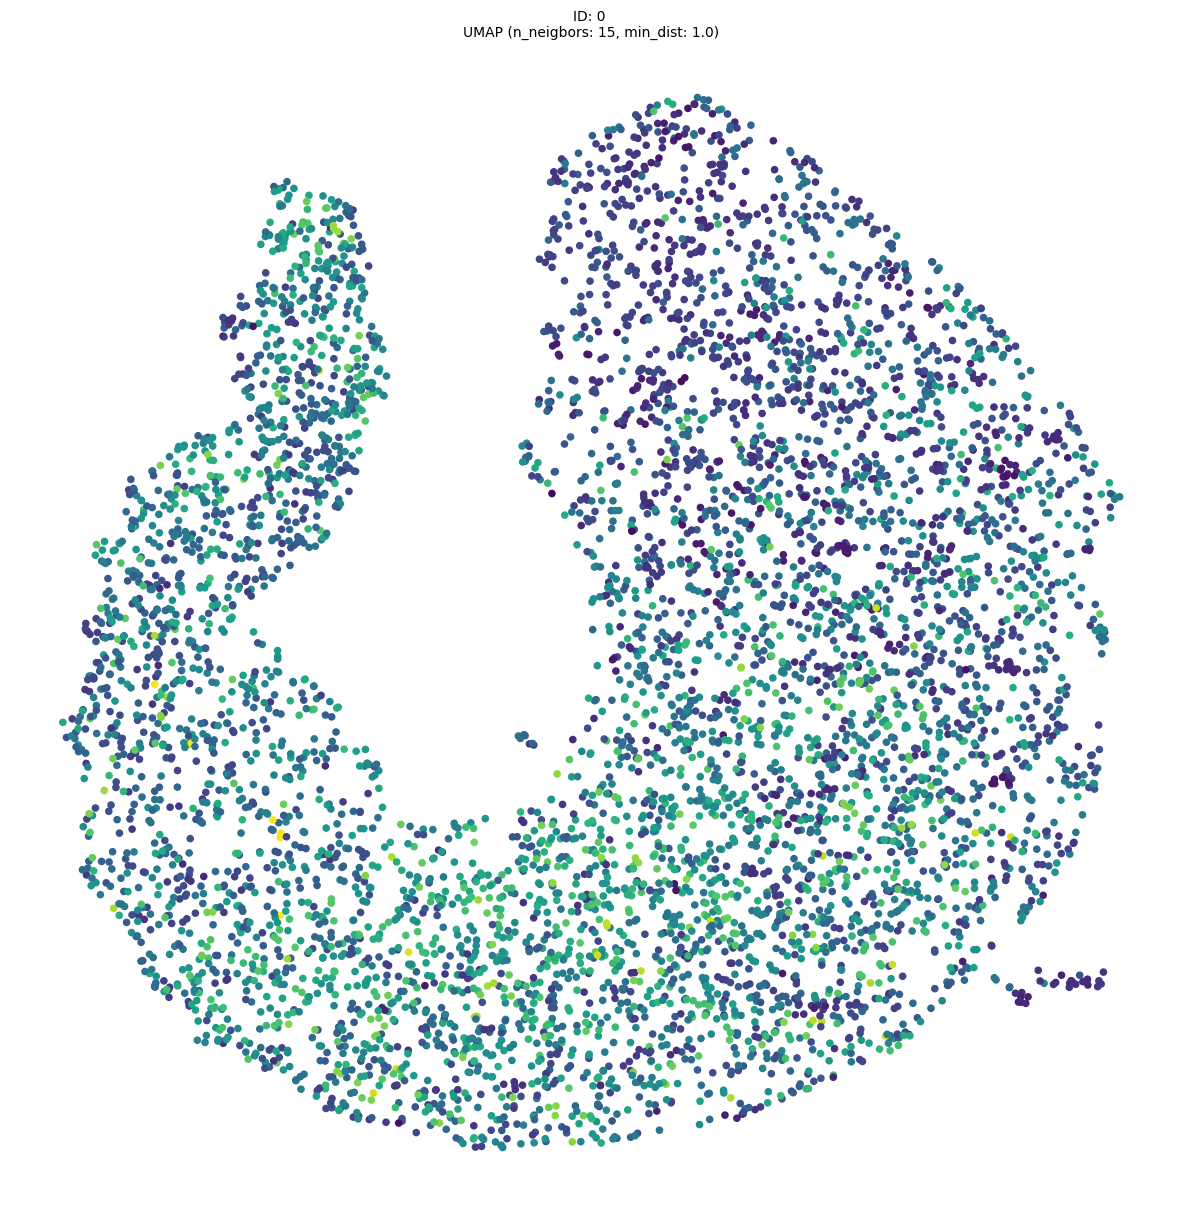

In [8]:
umap_plot = moddr.visualization.display_embeddings(
    [reference_embedding], figsize_columns=1, show_edges=False
)

## Modification via moddr-framework

The initial positioning is modified using the framework in the following way. To achieve this, the Fruchterman-Reingold (FR), Kamada-Kawai (KK) and MDS layout methods are applied in succession. Apart from the layout method, the same parameters are used for all test series (see below). Due to space constraints, outputs are omitted in the example notebooks and can be generated by local execution.

In [6]:
community_resolutions = [0.0001, 0.001, 0.005, 0.05]
n_neighbors = 15
dr_method = "UMAP"
graph_method = "DR"
boundary_neighbors = False
layout_params_fr = [10, 100, 500, 1000]
layout_params_kk_mds = [0.2, 0.4, 0.6, 0.8, 1.0]

### Modification via Fruchterman-Reingold

In [7]:
mod_embeddings_fr = moddr.processing.run_pipeline(
    data=X,
    sim_features=sim_features,
    dr_method=dr_method,
    dr_param_n_neighbors=n_neighbors,
    graph_method=graph_method,
    community_resolutions=community_resolutions,
    layout_method="FR",
    boundary_neighbors=boundary_neighbors,
    layout_params=layout_params_fr,
    compute_metrics=True,
    verbose=True,
)

------------------------------------------------------------
Start moddr pipeline with the following parameters:
Similarity Features: ['sulphates', 'alcohol', 'citric_acid', 'pH']
Dimensionality Reduction Method: UMAP with 15 neighbors
Graph Construction Method: DR
Community Detection Resolutions: [0.0001, 0.001, 0.005, 0.05]
Layout Method: FR
Boundary Neighbors: False
Layout Parameters: [10, 100, 500, 1000]
Compute Metrics: True

INFO: Inverting distances via 1 - distances, as normalization is applied.
------------------------------------------------------------
Computing communities via Leiden detection for embedding 0: `UMAP (n_neigbors: 15, min_dist: 1.0)' with resolution '0.0001'.
Computation finished after 0.42 seconds.
Found 7 communities.
------------------------------------------------------------
------------------------------------------------------------
Compute new positions for embedding: `UMAP (n_neigbors: 15, min_dist: 1.0), Leiden (resolution: 0.0001)'.
Start computati

Detailed overview of all iterations

In [8]:
moddr.evaluation.create_report(mod_embeddings_fr, metadata=True, metrics=True)

,obj_id,dr_method,dr_params,k_neighbors,com_detection,com_detection_params,layout_method,layout_params,trustworthiness,continuity,rnx,sim_stress,sim_stress_com,sim_stress_com_diff,rank_score,distance_score,total_score
0,0,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,,{},,{},0.993696,0.997842,0.532737,0.650286,0.650286,0.000000,0.841425,0.424857,0.633141
1,1,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},FR,"{'iterations': 10, 'boundary_neighbors': False}",0.994179,0.990363,0.530638,0.668703,0.663409,-0.013393,0.838393,0.418997,0.628695
2,2,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},FR,"{'iterations': 100, 'boundary_neighbors': False}",0.995138,0.990373,0.566055,0.669504,0.681870,0.005068,0.850522,0.413981,0.632251
3,3,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},FR,"{'iterations': 500, 'boundary_neighbors': False}",0.995157,0.990359,0.566466,0.669523,0.682798,0.005996,0.850661,0.413740,0.632200
4,4,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},FR,"{'iterations': 1000, 'boundary_neighbors': False}",0.995158,0.990359,0.566487,0.669523,0.682866,0.006063,0.850668,0.413723,0.632195
5,5,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 10, 'boundary_neighbors': False}",0.995889,0.993102,0.543548,0.650404,0.656181,-0.015231,0.844180,0.428606,0.636393
6,6,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 100, 'boundary_neighbors': False}",0.997591,0.992522,0.633647,0.650509,0.671004,-0.000408,0.874587,0.424848,0.649717
7,7,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 500, 'boundary_neighbors': False}",0.997717,0.992396,0.635540,0.650500,0.671244,-0.000168,0.875218,0.424792,0.650005
8,8,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},FR,"{'iterations': 1000, 'boundary_neighbors': False}",0.997719,0.992349,0.635447,0.650474,0.670965,-0.000446,0.875172,0.424875,0.650023
9,9,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.005},FR,"{'iterations': 10, 'boundary_neighbors': False}",0.995938,0.995787,0.586689,0.650126,0.648165,-0.023153,0.859471,0.430725,0.645098


In [ ]:
metrics_report_fr = moddr.evaluation.create_report(
    mod_embeddings_fr, metadata=False, metrics=True
)
metrics_plot_fr = moddr.visualization.plot_metrics_report(metrics_report_fr)

In [ ]:
embedding_graphs_fr = moddr.visualization.display_embeddings(
    mod_embeddings_fr, figsize_columns=3, show_edges=False
)

### Modification via Kamada-Kawai

In [8]:
mod_embeddings_kk = moddr.processing.run_pipeline(
    data=X,
    sim_features=sim_features,
    dr_method=dr_method,
    dr_param_n_neighbors=n_neighbors,
    graph_method=graph_method,
    community_resolutions=community_resolutions,
    layout_method="KK",
    boundary_neighbors=boundary_neighbors,
    layout_params=layout_params_kk_mds,
    compute_metrics=True,
    verbose=True,
)

------------------------------------------------------------
Start moddr pipeline with the following parameters:
Similarity Features: ['sulphates', 'alcohol', 'citric_acid', 'pH']
Dimensionality Reduction Method: UMAP with 15 neighbors
Graph Construction Method: DR
Community Detection Resolutions: [0.0001, 0.001, 0.005, 0.05]
Layout Method: KK
Boundary Neighbors: False
Layout Parameters: [0.2, 0.4, 0.6, 0.8, 1.0]
Compute Metrics: True

------------------------------------------------------------
Computing communities via Leiden detection for embedding 0: `UMAP (n_neigbors: 15, min_dist: 1.0)' with resolution '0.0001'.
Computation finished after 0.41 seconds.
Found 8 communities.
------------------------------------------------------------
------------------------------------------------------------
Compute new positions for embedding: `UMAP (n_neigbors: 15, min_dist: 1.0), Leiden (resolution: 0.0001)'.
Start computation with Kamada Kawai-algorithm.
Computation of new positions finished

Detailed overview of all iterations

In [9]:
moddr.evaluation.create_report(mod_embeddings_kk, metadata=True, metrics=True)

,obj_id,dr_method,dr_params,k_neighbors,com_detection,com_detection_params,layout_method,layout_params,trustworthiness,continuity,rnx,sim_stress,sim_stress_com,sim_stress_com_diff,rank_score,distance_score,total_score
0,0,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,,{},,{},0.993696,0.997842,0.532737,0.650286,0.650286,0.000000,0.841425,0.424857,0.633141
1,1,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},KK,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.993651,0.997734,0.532058,0.650892,0.659850,-0.001899,0.841148,0.425029,0.633088
2,2,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},KK,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.993457,0.997454,0.530494,0.651744,0.658107,-0.003642,0.840469,0.425039,0.632754
3,3,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},KK,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.993306,0.996997,0.527419,0.652871,0.656384,-0.005366,0.839241,0.424906,0.632073
4,4,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},KK,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.993189,0.996324,0.522769,0.654296,0.654683,-0.007066,0.837427,0.424618,0.631023
5,5,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},KK,"{'balance_factor': 1.0, 'boundary_neighbors': ...",0.993037,0.995397,0.514962,0.656038,0.653047,-0.008703,0.834465,0.424157,0.629311
6,6,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.992580,0.997604,0.492455,0.650446,0.672244,-0.005462,0.827546,0.426143,0.626844
7,7,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.990817,0.996918,0.421920,0.650642,0.668672,-0.009034,0.803219,0.426937,0.615078
8,8,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.988476,0.995918,0.360243,0.650866,0.666115,-0.011590,0.781546,0.427464,0.604505
9,9,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},KK,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.985256,0.994658,0.317986,0.651116,0.664220,-0.013485,0.765967,0.427813,0.596890


In [ ]:
metrics_report_kk = moddr.evaluation.create_report(
    mod_embeddings_kk, metadata=False, metrics=True
)
metrics_plot_kk = moddr.visualization.plot_metrics_report(metrics_report_kk)

In [ ]:
embedding_graphs_kk = moddr.visualization.display_embeddings(
    mod_embeddings_kk, figsize_columns=3, show_edges=False
)

### Modification via MDS

In [7]:
mod_embeddings_mds = moddr.processing.run_pipeline(
    data=X,
    sim_features=sim_features,
    dr_method=dr_method,
    dr_param_n_neighbors=n_neighbors,
    graph_method=graph_method,
    community_resolutions=community_resolutions,
    layout_method="MDS",
    boundary_neighbors=boundary_neighbors,
    layout_params=layout_params_kk_mds,
    compute_metrics=True,
    verbose=True,
)

------------------------------------------------------------
Start moddr pipeline with the following parameters:
Similarity Features: ['sulphates', 'alcohol', 'citric_acid', 'pH']
Dimensionality Reduction Method: UMAP with 15 neighbors
Graph Construction Method: DR
Community Detection Resolutions: [0.0001, 0.001, 0.005, 0.05]
Layout Method: MDS
Boundary Neighbors: False
Layout Parameters: [0.2, 0.4, 0.6, 0.8, 1.0]
Compute Metrics: True

------------------------------------------------------------
Computing communities via Leiden detection for embedding 0: `UMAP (n_neigbors: 15, min_dist: 1.0)' with resolution '0.0001'.
Computation finished after 0.42 seconds.
Found 8 communities.
------------------------------------------------------------
------------------------------------------------------------
Compute new positions for embedding: `UMAP (n_neigbors: 15, min_dist: 1.0), Leiden (resolution: 0.0001)'.
Start computation with MDS-algorithm.
Computation of new positions finished after 5

Detailed overview of all iterations

In [8]:
moddr.evaluation.create_report(mod_embeddings_mds, metadata=True, metrics=True)

,obj_id,dr_method,dr_params,k_neighbors,com_detection,com_detection_params,layout_method,layout_params,trustworthiness,continuity,rnx,sim_stress,sim_stress_com,sim_stress_com_diff,rank_score,distance_score,total_score
0,0,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,,{},,{},0.993696,0.997842,0.532737,0.650286,0.650286,0.000000,0.841425,0.424857,0.633141
1,1,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},MDS,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.967414,0.979516,0.138014,0.653934,0.581219,-0.100422,0.694981,0.448139,0.571560
2,2,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},MDS,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.911506,0.936945,0.070781,0.652588,0.469635,-0.212007,0.639744,0.476708,0.558226
3,3,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},MDS,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.843047,0.889062,0.052142,0.649671,0.394774,-0.286867,0.594750,0.496881,0.545816
4,4,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},MDS,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.781593,0.843172,0.043532,0.647033,0.364347,-0.317294,0.556099,0.505807,0.530953
5,5,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.0001},MDS,"{'balance_factor': 1.0, 'boundary_neighbors': ...",0.734272,0.803968,0.038523,0.644633,0.359123,-0.322518,0.525588,0.508313,0.516950
6,6,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.2, 'boundary_neighbors': ...",0.969699,0.981558,0.144021,0.651045,0.504925,-0.170546,0.698426,0.467114,0.582770
7,7,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.4, 'boundary_neighbors': ...",0.917362,0.944263,0.073415,0.650077,0.394564,-0.280908,0.645013,0.495188,0.570101
8,8,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.6, 'boundary_neighbors': ...",0.850086,0.899044,0.051957,0.648720,0.355242,-0.320229,0.600362,0.505697,0.553030
9,9,UMAP,"{'n_neighbors': 15, 'min_dist': 1.0, 'random_s...",15,Leiden,{'resolution': 0.001},MDS,"{'balance_factor': 0.8, 'boundary_neighbors': ...",0.790651,0.853076,0.042761,0.647149,0.342814,-0.332658,0.562163,0.509590,0.535876


In [ ]:
metrics_report_mds = moddr.evaluation.create_report(
    mod_embeddings_mds, metadata=False, metrics=True
)
metrics_plot_mds = moddr.visualization.plot_metrics_report(metrics_report_mds)

In [ ]:
embedding_graphs_mds = moddr.visualization.display_embeddings(
    mod_embeddings_mds, figsize_columns=3, show_edges=False
)